In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
df = pd.read_csv("Data_Port\water_potability.csv")

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Turjo\AppData\Local\Temp\ipykernel_17564\2132376246.py:1: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("Data_Port\water_potability.csv")


In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

C:\Users\Turjo\AppData\Local\Temp\ipykernel_17564\2876935244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(), inplace=True)
C:\Users\Turjo\AppData\Local\Temp\ipykernel_17564\2876935244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [9]:
df_majority = df[df.Potability==0]
df_minority = df[df.Potability==1]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=123)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X = df_upsampled.drop(columns=['Potability', 'Trihalomethanes'])
y = df_upsampled['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
model = RandomForestClassifier(bootstrap=False, min_samples_leaf=4, n_estimators=200, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4, n_estimators=200,
                       random_state=0)

In [11]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ph                0.152023
Sulfate           0.144798
Hardness          0.137103
Solids            0.124224
Chloramines       0.120676
Organic_carbon    0.111353
Turbidity         0.108192
Conductivity      0.101632
dtype: float64

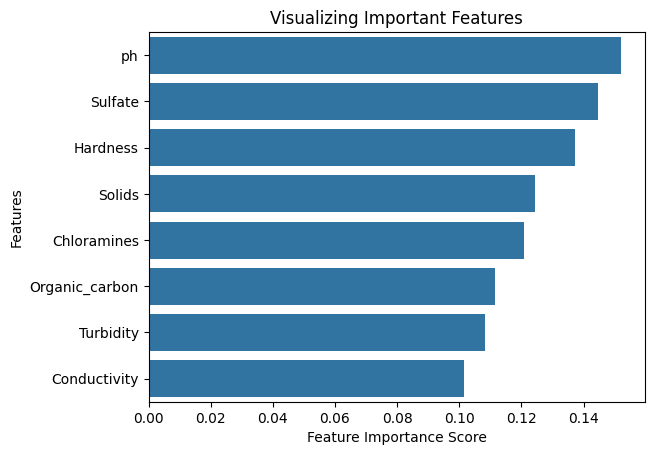

In [13]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [14]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       407
           1       0.83      0.86      0.84       393

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



In [15]:
cvs = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(cvs)
print(cvs.mean())
print(cvs.std())

[0.7875     0.82472613 0.79968701 0.80751174 0.78090767]
0.800066510172144
0.015418501237856317


In [16]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
best_model = grid.best_estimator_
test_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)
print("Test Score:", test_score)
print("Best Model:", best_model)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8056983568075117
Test Score: 0.8475
Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=0)
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       407
           1       0.85      0.84      0.84       393

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800



In [17]:
# Import required libraries
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate random data
np.random.seed(0)
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a standard scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the scaled data
model.fit(X_train_scaled, y_train)

# Save the model and scaler using joblib
joblib.dump(model, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Load the saved model and scaler
loaded_model = joblib.load('model.joblib')
loaded_scaler = joblib.load('scaler.joblib')

# Use the loaded scaler to transform new data
new_data = np.random.rand(10, 10)
new_data_scaled = loaded_scaler.transform(new_data)

# Use the loaded model to make predictions on the scaled new data
predictions = loaded_model.predict(new_data_scaled)

print(predictions)

[1 1 1 1 0 0 0 0 0 0]


In [2]:
import tkinter as tk
from tkinter import messagebox

def predict():
    try:
        # Retrieve input values
        ph = float(ph_entry.get())
        hardness = float(hardness_entry.get())
        solids = float(solids_entry.get())
        chloramines = float(chloramines_entry.get())
        sulfate = float(sulfate_entry.get())
        conductivity = float(conductivity_entry.get())
        organic_carbon = float(organic_carbon_entry.get())
        trihalomethanes = float(trihalomethanes_entry.get())
        turbidity = float(turbidity_entry.get())
        
        # Example: You can replace this section with your prediction logic
        features = [ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]
        # Replace the line below with your model's prediction code
        result = "Potable" if sum(features) % 2 == 0 else "Not Potable"  # Dummy prediction logic
        
        # Display the result
        messagebox.showinfo("Prediction Result", f"The water is: {result}")
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values for all fields.")

# Create the GUI window
root = tk.Tk()
root.title("Water Potability Prediction")

# Create input fields and labels
fields = [
    "ph", "Hardness", "Solids", "Chloramines", "Sulfate", 
    "Conductivity", "Organic Carbon", "Trihalomethanes", "Turbidity"
]

entries = {}
for idx, field in enumerate(fields):
    label = tk.Label(root, text=f"{field}:")
    label.grid(row=idx, column=0, padx=10, pady=5)
    entry = tk.Entry(root)
    entry.grid(row=idx, column=1, padx=10, pady=5)
    entries[field] = entry

# Assign entries to variables
ph_entry = entries["ph"]
hardness_entry = entries["Hardness"]
solids_entry = entries["Solids"]
chloramines_entry = entries["Chloramines"]
sulfate_entry = entries["Sulfate"]
conductivity_entry = entries["Conductivity"]
organic_carbon_entry = entries["Organic Carbon"]
trihalomethanes_entry = entries["Trihalomethanes"]
turbidity_entry = entries["Turbidity"]

# Add Predict Button
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=len(fields), column=0, columnspan=2, pady=10)

# Run the application
root.mainloop()
